<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_24_NeuralNetwork1D_HiddenNeurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
torch.manual_seed(0)

In [56]:
#define plotting function
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='Training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='Training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='Neural network ')

    plt.legend()
    plt.show()

In [57]:
#define the sample data class
class SampleData(Dataset):
  def __init__(self):
    self.x = torch.linspace(-20,20,100).view(-1,1)
    self.y = torch.zeros(self.x.shape[0])
    self.y[(self.x[:,0] > -10 ) & (self.x[:,0] < -5)] = 1
    self.y[(self.x[:,0] > 5 ) & (self.x[:,0] < 10)] = 1
    self.y = self.y.view(-1,1)
    self.len = self.x.shape[0]
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.len

In [58]:
#define the network
class NeuralNet(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(D_in,H)
    self.l2 = nn.Linear(H,D_out)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    out1 = self.sigmoid(self.l1(x))
    y_pred = self.sigmoid(self.l2(out1))
    return y_pred

In [59]:
#create the model
model = NeuralNet(1,9,1)
model.state_dict()

OrderedDict([('l1.weight', tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230],
                      [-0.7359],
                      [-0.3852],
                      [ 0.2682],
                      [-0.0198],
                      [ 0.7929],
                      [-0.0887]])),
             ('l1.bias',
              tensor([ 0.2646, -0.3022, -0.1966, -0.9553, -0.6623, -0.4122,  0.0370,  0.3953,
                       0.6000])),
             ('l2.weight',
              tensor([[-0.2260, -0.1452,  0.1211,  0.2768, -0.0686,  0.2494, -0.0537,  0.0353,
                        0.3018]])),
             ('l2.bias', tensor([-0.3092]))])

In [60]:
#create optimizer,criterion,dataset
optimizer = optim.Adam(model.parameters(),lr = 0.1)
criterion = nn.BCELoss()
dataset = SampleData()
trainloader = DataLoader(dataset = dataset,batch_size = 100)

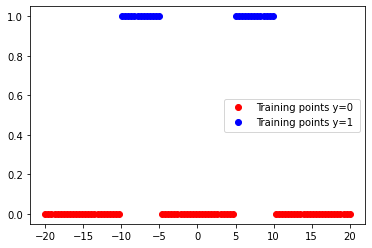

In [61]:
PlotStuff(dataset.x,dataset.y,leg=False)

In [62]:
EPOCHS = 5000
LOSS = []

In [63]:
#define training function
def train_model(EPOCHS):
  for epoch in range(EPOCHS):
    for x,y in trainloader:
      y_pred = model(x)
      loss = criterion(y_pred,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    LOSS.append(loss.item())
    if (epoch % 500 == 0):
      PlotStuff(dataset.x,dataset.y,model)
      

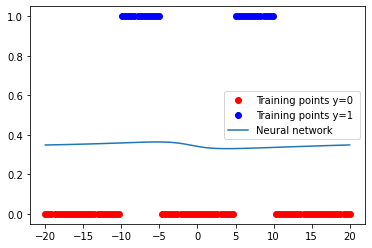

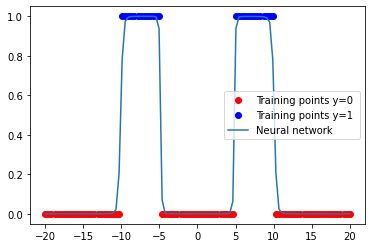

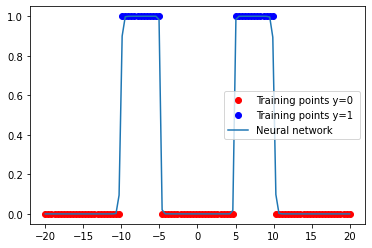

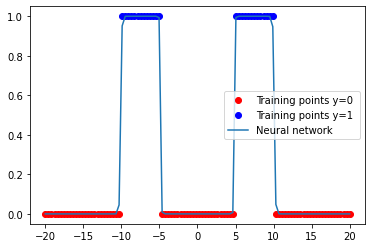

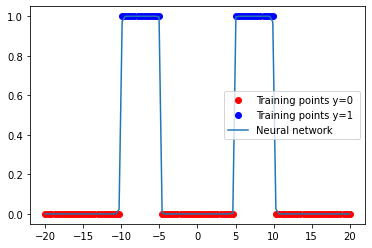

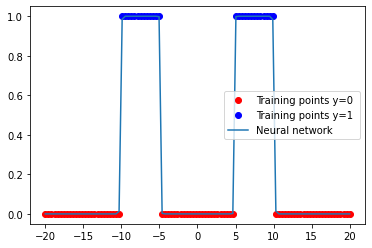

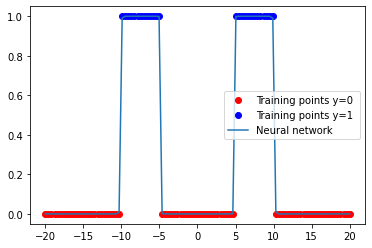

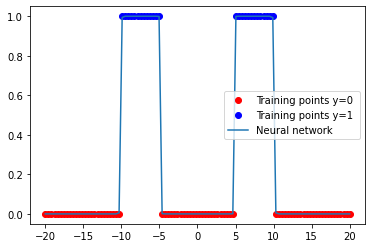

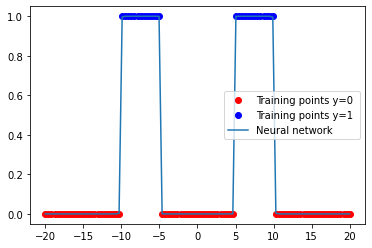

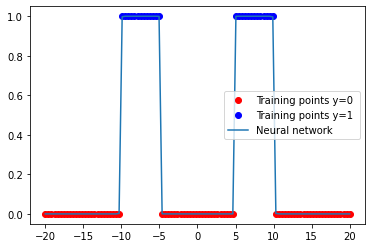

In [64]:
train_model(EPOCHS)

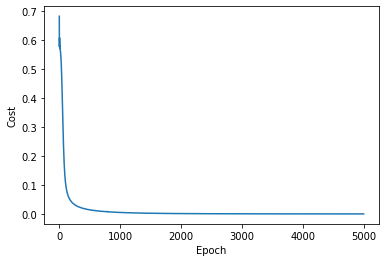

In [65]:
plt.plot(LOSS)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()